Generating synthetic dataset (replace with your actual data loading)...
Original Dataset shape: X=(100, 4), y=(100,)
Applying StandardScaler...
Applying PCA (reducing to 2 components for quantum feature map)...
Data shape after PCA: (100, 2)
Splitting data into training and testing sets (70/30 split)...
Training data shape: X_train=(70, 2), y_train=(70,)
Testing data shape: X_test=(30, 2), y_test=(30,)
Defining ZZFeatureMap...
Initializing StatevectorSampler for ideal quantum computations...
Initializing ComputeUncompute fidelity module...
Creating ideal FidelityQuantumKernel...

--- Running QSVM under Ideal Conditions (using QSVC algorithm) ---
Initializing QSVC with ideal quantum kernel...
Training ideal QSVC model...
Making predictions with ideal QSVC...

--- Ideal QSVM Model Evaluation ---
Accuracy (Ideal QSVM): 0.4667
Precision (Ideal QSVM): 0.4444
Recall (Ideal QSVM): 0.2667
F1-Score (Ideal QSVM): 0.3333
Training Accuracy (Ideal QSVM): 0.7000
Generalization Gap (Ideal QSVM): 0.23

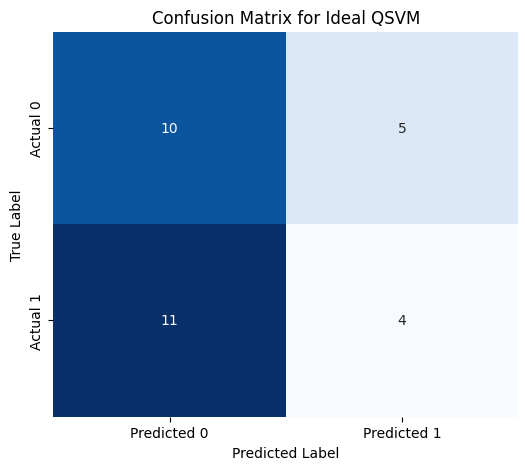


--- Running QSVM with Simulated Noise ---
Defined NoiseModel with depolarizing and readout errors.
Initializing AerSimulator with the defined noise model...


TypeError: StatevectorSampler.__init__() got an unexpected keyword argument 'options'

In [1]:
import numpy as np
from sklearn.datasets import make_classification # Used for synthetic data example
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Added for easier real data loading examples

# Qiskit imports for Quantum SVM (Modern API)
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler # Modern primitive for ideal simulations
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel # The modern kernel class
from qiskit_machine_learning.algorithms import QSVC # High-level QSVC algorithm

# Qiskit Aer for noisy simulations
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError

# Set a random seed for reproducibility across different runs
# This helps in debugging and ensuring consistent results for fixed parameters
np.random.seed(42)

# --- 1. Data Loading and Preprocessing ---
# IMPORTANT: Replace this synthetic data generation with your actual dataset loading.
# Your FYP documentation mentions Spambase and Lung Cancer datasets.

# Example for loading Spambase:
# try:
#     data_spambase = pd.read_csv('spambase.csv', header=None)
#     X = data_spambase.iloc[:, :-1].values # Features
#     y = data_spambase.iloc[:, -1].values  # Labels
#     print("Spambase dataset loaded.")
# except FileNotFoundError:
#     print("Spambase.csv not found. Using synthetic data for demonstration.")
#     X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0,
#                                n_clusters_per_class=1, random_state=42, n_classes=2)

# Example for loading Lung Cancer:
# Ensure you understand the label encoding for Lung Cancer dataset (e.g., 1, 2, 3 classes)
# and binarize it (e.g., class 1 vs. classes 2&3) as per your FYP's problem statement.
# try:
#     data_lung_cancer = pd.read_csv('lung_cancer.csv', header=None)
#     X = data_lung_cancer.iloc[:, :-1].values
#     # Assuming class 1 is negative (0), classes 2 and 3 are positive (1)
#     y = data_lung_cancer.iloc[:, -1].apply(lambda x: 0 if x == 1 else 1).values
#     print("Lung Cancer dataset loaded.")
# except FileNotFoundError:
#     print("lung_cancer.csv not found. Using synthetic data for demonstration.")
#     X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0,
#                                n_clusters_per_class=1, random_state=42, n_classes=2)


print("Generating synthetic dataset (replace with your actual data loading)...")
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42, n_classes=2)
print(f"Original Dataset shape: X={X.shape}, y={y.shape}")

# Apply StandardScaler for feature scaling
print("Applying StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction. Your FYP mentions 2 or 4 features.
# For QSVM with ZZFeatureMap, the number of features should match the number of qubits.
# Current quantum hardware/simulators are limited, so 2 components are common for examples.
# Adjust n_components based on your data and available quantum resources/simulator capabilities.
print("Applying PCA (reducing to 2 components for quantum feature map)...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Data shape after PCA: {X_pca.shape}")

# --- 2. Data Splitting ---
# Split data into training and testing sets (70% train, 30% test is a common split)
print("Splitting data into training and testing sets (70/30 split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 3. Quantum Kernel Definition ---
# This part is aligned with the GitHub notebook you shared.

# Define the ZZFeatureMap. The feature_dimension must match the PCA output.
print("Defining ZZFeatureMap...")
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2, entanglement="linear")

# Use StatevectorSampler for ideal (noiseless) quantum computations.
# This primitive computes statevector-level fidelity, which is exact.
print("Initializing StatevectorSampler for ideal quantum computations...")
ideal_sampler = Sampler()

# ComputeUncompute defines how the fidelity is measured.
# It uses the provided sampler to compute the overlap between quantum states.
print("Initializing ComputeUncompute fidelity module...")
ideal_fidelity = ComputeUncompute(sampler=ideal_sampler)

# FidelityQuantumKernel wraps the feature map and fidelity module to create the kernel.
print("Creating ideal FidelityQuantumKernel...")
ideal_quantum_kernel = FidelityQuantumKernel(fidelity=ideal_fidelity, feature_map=feature_map)

# --- 4. Quantum SVM Implementation (Ideal Conditions) ---

print("\n--- Running QSVM under Ideal Conditions (using QSVC algorithm) ---")

# Initialize QSVC using the ideal quantum kernel
# QSVC is a high-level algorithm that integrates the kernel computation and SVC training.
print("Initializing QSVC with ideal quantum kernel...")
qsvc_ideal = QSVC(quantum_kernel=ideal_quantum_kernel)

# Train the QSVC model
print("Training ideal QSVC model...")
qsvc_ideal.fit(X_train, y_train)

# Make predictions and evaluate
print("Making predictions with ideal QSVC...")
y_pred_ideal = qsvc_ideal.predict(X_test)

# --- 5. Evaluation Metrics (Ideal QSVM) ---
print("\n--- Ideal QSVM Model Evaluation ---")

accuracy_ideal = accuracy_score(y_test, y_pred_ideal)
precision_ideal = precision_score(y_test, y_pred_ideal, zero_division=0)
recall_ideal = recall_score(y_test, y_pred_ideal, zero_division=0)
f1_ideal = f1_score(y_test, y_pred_ideal, zero_division=0)

print(f"Accuracy (Ideal QSVM): {accuracy_ideal:.4f}")
print(f"Precision (Ideal QSVM): {precision_ideal:.4f}")
print(f"Recall (Ideal QSVM): {recall_ideal:.4f}")
print(f"F1-Score (Ideal QSVM): {f1_ideal:.4f}")

# Calculate generalization gap for ideal QSVM
y_train_pred_ideal = qsvc_ideal.predict(X_train)
train_accuracy_ideal = accuracy_score(y_train, y_train_pred_ideal)
generalization_gap_ideal = abs(train_accuracy_ideal - accuracy_ideal)

print(f"Training Accuracy (Ideal QSVM): {train_accuracy_ideal:.4f}")
print(f"Generalization Gap (Ideal QSVM): {generalization_gap_ideal:.4f}")

# Plotting Confusion Matrix for Ideal QSVM
cm_ideal = confusion_matrix(y_test, y_pred_ideal)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ideal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Ideal QSVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 6. Quantum SVM Implementation (with Simulated Noise) ---

print("\n--- Running QSVM with Simulated Noise ---")

# Define a noise model (example: depolarizing error and readout error)
# Adjust error rates based on typical NISQ device characteristics or your FYP's requirements.
# These values are illustrative and should be chosen based on realistic quantum device
# parameters or your experimental setup.
noise_model = NoiseModel()

# Single-qubit gate error (e.g., U1, U2, U3 gates often represented as 'rz', 'sx', 'x' in Qiskit)
p_gate1 = 0.001 # 0.1% depolarizing error for single-qubit gates
p_gate2 = 0.01  # 1% depolarizing error for two-qubit gates (CX)

# Add depolarizing error to all single-qubit gates
# Ensure the gate names match those used in your ZZFeatureMap's compiled circuit
noise_model.add_all_qubit_quantum_error(depolarizing_error(p_gate1, 1), ['rz', 'sx', 'x'])
# Add depolarizing error to CX (CNOT) gates
noise_model.add_all_qubit_quantum_error(depolarizing_error(p_gate2, 2), ['cx'])

# Readout error: prob_meas0_prep1 (probability of measuring 0 given prepared 1)
# and prob_meas1_prep0 (probability of measuring 1 given prepared 0).
# This is applied to all qubits that will be measured.
p_readout01 = 0.02 # 2% error for 1 measured as 0
p_readout10 = 0.01 # 1% error for 0 measured as 1

# FIXED: Apply readout error to each relevant qubit individually
# This ensures the dimensions of the error matrix match the single qubit it's applied to.
for qubit_idx in [0, 1]: # Assuming 2 qubits from PCA
    noise_model.add_readout_error([[1 - p_readout10, p_readout10], [p_readout01, 1 - p_readout01]], [qubit_idx])

print("Defined NoiseModel with depolarizing and readout errors.")

# Create an AerSimulator with the noise model.
# This simulator mimics the behavior of a real noisy quantum device.
print("Initializing AerSimulator with the defined noise model...")
# FIXED: Pass AerSimulator as 'backend' within the 'options' dictionary for Sampler
noisy_sampler = Sampler(options={"backend": AerSimulator(noise_model=noise_model)})

# Create ComputeUncompute fidelity module for noisy simulations
print("Initializing ComputeUncompute fidelity module for noisy simulations...")
noisy_fidelity = ComputeUncompute(sampler=noisy_sampler)

# Create a FidelityQuantumKernel that uses the noisy simulator for evaluation.
print("Creating noisy FidelityQuantumKernel...")
noisy_quantum_kernel = FidelityQuantumKernel(fidelity=noisy_fidelity, feature_map=feature_map)

# Initialize QSVC with the noisy quantum kernel
print("Initializing QSVC with noisy quantum kernel...")
qsvc_noisy = QSVC(quantum_kernel=noisy_quantum_kernel)

# Train the noisy QSVC model
print("Training noisy QSVC model (this will be slower due to noise simulation)...")
qsvc_noisy.fit(X_train, y_train)

# Make predictions and evaluate for the noisy QSVM
print("Making predictions with noisy QSVC...")
y_pred_noisy = qsvc_noisy.predict(X_test)

# --- 7. Evaluation Metrics (Noisy QSVM) ---
print("\n--- Noisy QSVM Model Evaluation ---")

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
precision_noisy = precision_score(y_test, y_pred_noisy, zero_division=0)
recall_noisy = recall_score(y_test, y_pred_noisy, zero_division=0)
f1_noisy = f1_score(y_test, y_pred_noisy, zero_division=0)

print(f"Accuracy (Noisy QSVM): {accuracy_noisy:.4f}")
print(f"Precision (Noisy QSVM): {precision_noisy:.4f}")
print(f"Recall (Noisy QSVM): {recall_noisy:.4f}")
print(f"F1-Score (Noisy QSVM): {f1_noisy:.4f}")

# Calculate generalization gap for noisy QSVM
y_train_pred_noisy = qsvc_noisy.predict(X_train)
train_accuracy_noisy = accuracy_score(y_train, y_train_pred_noisy)
generalization_gap_noisy = abs(train_accuracy_noisy - accuracy_noisy)

print(f"Training Accuracy (Noisy QSVM): {train_accuracy_noisy:.4f}")
print(f"Generalization Gap (Noisy QSVM): {generalization_gap_noisy:.4f}")

# Plotting Confusion Matrix for Noisy QSVM
cm_noisy = confusion_matrix(y_test, y_pred_noisy)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_noisy, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Noisy QSVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 8. Classical Linear SVM Implementation (for Comparison) ---

print("\n--- Running Classical Linear SVM (for comparison) ---")

# Initialize and train a classical Linear SVC
# Use the scaled and PCA-reduced data for fair comparison with QSVM.
# C is the regularization parameter, can be tuned for optimal performance.
print("Initializing and training Classical Linear SVC...")
classical_svm = SVC(kernel='linear', C=1.0, random_state=42)
classical_svm.fit(X_train, y_train)

# Make predictions on the test set
print("Making predictions with Classical Linear SVM...")
y_pred_classical = classical_svm.predict(X_test)

# --- 9. Evaluation Metrics (Classical Linear SVM) ---
print("\n--- Classical Linear SVM Model Evaluation ---")

accuracy_classical = accuracy_score(y_test, y_pred_classical)
precision_classical = precision_score(y_test, y_pred_classical, zero_division=0)
recall_classical = recall_score(y_test, y_pred_classical, zero_division=0)
f1_classical = f1_score(y_test, y_pred_classical, zero_division=0)

print(f"Accuracy (Classical SVM): {accuracy_classical:.4f}")
print(f"Precision (Classical SVM): {precision_classical:.4f}")
print(f"Recall (Classical SVM): {recall_classical:.4f}")
print(f"F1-Score (Classical SVM): {f1_classical:.4f}")

# Calculate generalization gap for classical SVM
y_train_pred_classical = classical_svm.predict(X_train)
train_accuracy_classical = accuracy_score(y_train, y_train_pred_classical)
generalization_gap_classical = abs(train_accuracy_classical - accuracy_classical)

print(f"Training Accuracy (Classical SVM): {train_accuracy_classical:.4f}")
print(f"Generalization Gap (Classical SVM): {generalization_gap_classical:.4f}")

# Plotting Confusion Matrix for Classical SVM
cm_classical = confusion_matrix(y_test, y_pred_classical)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_classical, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Classical Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 10. Summary of Results ---
print("\n--- Overall Comparison of Generalization Performance ---")
print(f"Ideal QSVM Accuracy: {accuracy_ideal:.4f}, Gen Gap: {generalization_gap_ideal:.4f}")
print(f"Noisy QSVM Accuracy: {accuracy_noisy:.4f}, Gen Gap: {generalization_gap_noisy:.4f}")
print(f"Classical SVM Accuracy: {accuracy_classical:.4f}, Gen Gap: {generalization_gap_classical:.4f}")
